In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [47]:
from fastai.structured import apply_cats, proc_df
from fastai.column_data import *
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import dill as pickle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

import numpy as np
np.set_printoptions(threshold=50, edgeitems=20)
data_path=Path('data/')
PATH = data_path

In [64]:
train_df = pd.read_feather(f'{PATH}train_df')
test_df = pd.read_feather(f'{PATH}test_df')

In [85]:
val_idx = pickle.load(open(f'{PATH}val_idx','rb'))
cat_vars = pickle.load(open(f'{PATH}cat_vars','rb'))
contin_vars = pickle.load(open(f'{PATH}contin_vars','rb'))
emb_szs = pickle.load(open(f'{PATH}emb_szs','rb'))

In [86]:
contin_vars

['DAYS_EMPLOYED',
 'APARTMENTS_AVG',
 'AMT_GOODS_PRICE',
 'NONLIVINGAPARTMENTS_MEDI',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'REGION_POPULATION_RELATIVE',
 'NONLIVINGAREA_MEDI',
 'EXT_SOURCE_3',
 'NONLIVINGAREA_AVG',
 'LANDAREA_MEDI',
 'ENTRANCES_MEDI',
 'CNT_CHILDREN',
 'ELEVATORS_AVG',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'BASEMENTAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'FLOORSMIN_MEDI',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'OWN_CAR_AGE',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'FLOORSMIN_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLOORSMAX_MEDI',
 'ENTRANCES_MODE',
 'DAYS_LAST_PHONE_CHANGE',
 'COMMONAREA_AVG',
 'ENTRANCES_AVG',
 'LIVINGAPARTMENTS_AVG',
 'AMT_CREDIT',
 'YEARS_BEGINEXPLUATATION_MODE',
 'LANDAREA_AVG',
 'CNT_FAM_MEMBERS',
 'APARTMENTS_MODE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'COMMONAREA_MODE',
 'EXT_SOURCE_2',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'FLOORSMAX_MODE',
 'DAYS_REGISTRATION',
 'LIVI

In [66]:
y = pickle.load(open(f'{PATH}y','rb'))

In [67]:
train_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1,2,1,2,0.0,202500.0,406597.5,24700.5,351000.0,...,1,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,1,1,1,1,0.0,270000.0,1293502.5,35698.5,1129500.0,...,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,2,2,2,2,0.0,67500.0,135000.0,6750.0,135000.0,...,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,1,1,1,2,0.0,135000.0,312682.5,29686.5,297000.0,...,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,1,2,1,2,0.0,121500.0,513000.0,21865.5,513000.0,...,2,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# contin_column_index = train_df.columns[~train_df.columns.isin(contin_vars)]
cont_feats_idx = np.array([train_df.columns.get_loc(x) 
                           for x in train_df.columns[train_df.columns.isin(contin_vars)]])

In [92]:
train_df.columns.isin(contin_vars)

array([ True, False, False, False, False,  True,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True, ..., False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,  True,  True,  True])

In [93]:
train_df.columns[train_df.columns.isin(contin_vars)]

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_

In [94]:
cont_feats_idx

array([  0,   5,   6,   7,   8,   9,  15,  16,  17,  18,  19,  20,  27,  39,  40,  41,  42,  43,  44,  45,
       ...,  76,  77,  78,  79,  80,  81,  82,  83,  86,  89,  90,  91,  92,  93, 102, 103, 104, 105, 106,
       107])

In [95]:
scaler = StandardScaler()
values = train_df.values
values[:, cont_feats_idx] = scaler.fit_transform(values[:, cont_feats_idx])

In [96]:
values[0][0]

-1.7334226

In [97]:
values.shape

(307511, 108)

In [98]:
scaled_train_df = pd.DataFrame(data=values, columns=list(train_df.columns))

In [99]:
scaled_train_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733423,1.0,2.0,1.0,2.0,-0.577538,0.142129,-0.478095,-0.166065,-0.505662,...,1.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.346719
1,-1.733413,1.0,1.0,1.0,1.0,-0.577538,0.426792,1.725450,0.592710,1.600480,...,1.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.885565
2,-1.733403,2.0,2.0,2.0,2.0,-0.577538,-0.427196,-1.152888,-1.404507,-1.090025,...,1.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.885565
3,-1.733384,1.0,1.0,1.0,2.0,-0.577538,-0.142533,-0.711430,0.177930,-0.651753,...,1.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.885565
4,-1.733374,1.0,2.0,1.0,2.0,-0.577538,-0.199466,-0.213734,-0.361657,-0.067390,...,2.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.885565
5,-1.733364,1.0,2.0,1.0,2.0,-0.577538,-0.294354,-0.269647,0.028286,-0.225655,...,1.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,-0.269947,1.035362,-0.346719
6,-1.733355,1.0,1.0,2.0,2.0,0.807273,0.009287,2.389376,0.979238,2.318760,...,2.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,0.897175,1.035362,0.192127
7,-1.733345,1.0,2.0,2.0,2.0,-0.577538,0.806342,2.313036,1.032638,2.683987,...,1.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.885565
8,-1.733335,1.0,1.0,1.0,2.0,-0.577538,-0.237421,1.044955,0.463557,1.016117,...,1.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.346719
9,-1.733325,2.0,2.0,1.0,2.0,-0.577538,-0.142533,-0.482064,-0.473114,-0.359571,...,1.0,1.0,1.0,1.0,-0.070987,-0.058766,-0.155838,-0.269947,-0.308620,-0.885565


In [28]:
md = ColumnarModelData.from_data_frame(
    PATH, val_idx, train_df, y.astype(np.int32), 
    cat_flds=cat_vars, bs=128, is_reg=False, test_df=test_df,
    is_multi=False
)

In [36]:
m = md.get_learner(emb_szs, len(train_df.columns)-len(cat_vars),
                   0.04, 2, [300,20], drops=[0.1, 0.05])

In [37]:
m.lr_find()

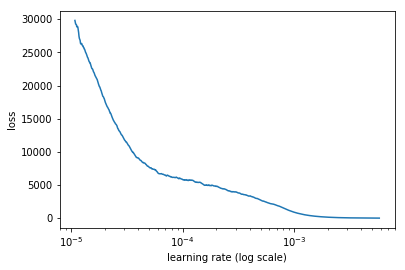

In [38]:
m.sched.plot()

In [39]:
lr = 1e-3

In [40]:
m.fit(lr, 2)

epoch      trn_loss   val_loss                                    
    0      0.506218   0.280442  
    1      0.283989   0.277975                                  


[array([0.27798])]

In [41]:
m.fit(lr/10, 1)

epoch      trn_loss   val_loss                                  
    0      0.275217   0.277953  


[array([0.27795])]

In [42]:
m.fit(lr/20, 2, cycle_len=2)

epoch      trn_loss   val_loss                                  
    0      0.291018   0.277953  
    1      0.281204   0.277953                                  
    2      0.290766   0.27795                                   
    3      0.28382    0.277951                                  


[array([0.27795])]

In [43]:
m.fit(lr/30, 2, 2)

epoch      trn_loss   val_loss                                  
    0      0.283068   0.278676  
    1      0.303665   0.280531                                  


[array([0.28053])]

In [60]:
m.fit(lr/100, 2, 5)

epoch      trn_loss   val_loss                                  
    0      0.284594   0.279959  
    1      0.277483   0.279631                                  



[array([0.27963])]

In [44]:
m.crit

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

In [21]:
m.save('val0')

In [22]:
m.load('val0')

# Eval

In [32]:
x1,y1=m.predict_with_targs()

In [33]:
pred_test=m.predict(True)

In [41]:
pred_test1=m.predict(True)

In [43]:
np.exp(pred_test1)

array([[0.87924, 0.12076],
       [0.82793, 0.17207],
       [0.9178 , 0.0822 ],
       [0.97836, 0.02164],
       [0.91002, 0.08998],
       [0.94203, 0.05797],
       [0.88247, 0.11753],
       [0.85327, 0.14673],
       [0.91375, 0.08625],
       [0.83292, 0.16708],
       [0.92627, 0.07373],
       [0.84667, 0.15333],
       [0.88639, 0.11361],
       [0.85384, 0.14616],
       [0.856  , 0.144  ],
       [0.8639 , 0.1361 ],
       [0.88851, 0.11149],
       [0.92442, 0.07558],
       [0.89245, 0.10755],
       [0.89268, 0.10732],
       ...,
       [0.87328, 0.12672],
       [0.86288, 0.13712],
       [0.94214, 0.05786],
       [0.86535, 0.13465],
       [0.93913, 0.06087],
       [0.82522, 0.17478],
       [0.89035, 0.10965],
       [0.93491, 0.06509],
       [0.90404, 0.09596],
       [0.93205, 0.06795],
       [0.9199 , 0.0801 ],
       [0.9378 , 0.0622 ],
       [0.9355 , 0.0645 ],
       [0.91575, 0.08425],
       [0.85753, 0.14247],
       [0.86165, 0.13835],
       [0.898  ,

In [34]:
# WHY EXP
pred_test = np.exp(pred_test)
pred_test

array([[0.87924, 0.12076],
       [0.82793, 0.17207],
       [0.9178 , 0.0822 ],
       [0.97836, 0.02164],
       [0.91002, 0.08998],
       [0.94203, 0.05797],
       [0.88247, 0.11753],
       [0.85327, 0.14673],
       [0.91375, 0.08625],
       [0.83292, 0.16708],
       [0.92627, 0.07373],
       [0.84667, 0.15333],
       [0.88639, 0.11361],
       [0.85384, 0.14616],
       [0.856  , 0.144  ],
       [0.8639 , 0.1361 ],
       [0.88851, 0.11149],
       [0.92442, 0.07558],
       [0.89245, 0.10755],
       [0.89268, 0.10732],
       ...,
       [0.87328, 0.12672],
       [0.86288, 0.13712],
       [0.94214, 0.05786],
       [0.86535, 0.13465],
       [0.93913, 0.06087],
       [0.82522, 0.17478],
       [0.89035, 0.10965],
       [0.93491, 0.06509],
       [0.90404, 0.09596],
       [0.93205, 0.06795],
       [0.9199 , 0.0801 ],
       [0.9378 , 0.0622 ],
       [0.9355 , 0.0645 ],
       [0.91575, 0.08425],
       [0.85753, 0.14247],
       [0.86165, 0.13835],
       [0.898  ,

In [38]:
pred_test[:,0]

array([0.87924, 0.82793, 0.9178 , 0.97836, 0.91002, 0.94203, 0.88247, 0.85327, 0.91375, 0.83292, 0.92627,
       0.84667, 0.88639, 0.85384, 0.856  , 0.8639 , 0.88851, 0.92442, 0.89245, 0.89268, ..., 0.87328,
       0.86288, 0.94214, 0.86535, 0.93913, 0.82522, 0.89035, 0.93491, 0.90404, 0.93205, 0.9199 , 0.9378 ,
       0.9355 , 0.91575, 0.85753, 0.86165, 0.898  , 0.89325, 0.91071, 0.86508], dtype=float32)

(array([ 200., 1456., 4245., 6646., 7659., 6996., 9273., 8716., 2439., 1114.]),
 array([0.77854, 0.80069, 0.82283, 0.84498, 0.86713, 0.88927, 0.91142, 0.93356, 0.95571, 0.97785, 1.     ]),
 <a list of 10 Patch objects>)

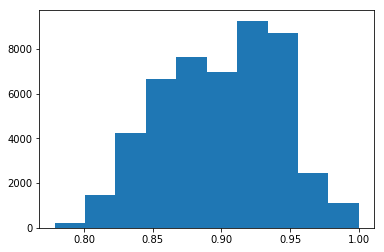

In [39]:
matplotlib.pyplot.hist(pred_test[:,0])

In [40]:
pred_test[:,0]

array([0.87924, 0.82793, 0.9178 , 0.97836, 0.91002, 0.94203, 0.88247, 0.85327, 0.91375, 0.83292, 0.92627,
       0.84667, 0.88639, 0.85384, 0.856  , 0.8639 , 0.88851, 0.92442, 0.89245, 0.89268, ..., 0.87328,
       0.86288, 0.94214, 0.86535, 0.93913, 0.82522, 0.89035, 0.93491, 0.90404, 0.93205, 0.9199 , 0.9378 ,
       0.9355 , 0.91575, 0.85753, 0.86165, 0.898  , 0.89325, 0.91071, 0.86508], dtype=float32)

In [98]:
res = predict_with_targs_(m.model, md.test_dl)

In [101]:
np.concatenate(res[0])

array([[-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       ...,
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
  

In [59]:
a1, b1 = np.concatenate(a), np.concatenate(b)

In [90]:
data  = list(iter(md.test_dl))

In [88]:
d

()

In [84]:
single_batch[0].shape

torch.Size([128, 38])

In [ ]:
test_df['TARGET']=pred_test

In [52]:
test_df['TARGET']=pred_test[:,1]

In [53]:
csv_fn=f'{PATH}/tmp/sub.csv'

In [57]:
test_df['SK_ID_CURR'] = test_df['SK_ID_CURR'].astype(int)

In [58]:
test_df[['SK_ID_CURR','TARGET']].to_csv(csv_fn, index=False)

In [59]:
FileLink(csv_fn)

/home/cheeseblubber/workspace/competition/home-default-credit/data/tmp/sub.csv

In [ ]:
# zero_pred = {ele[1]:0.0  for ele in ids}

In [ ]:
# with open('dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in zero_pred.items():
#        writer.writerow([key, value])
